In [33]:
#first step is importing all the necessary packages 

import pandas as pd
import numpy as np 
import scipy
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter
import seaborn as sns # used for plot interactive graph. 


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn  import linear_model

from sklearn.metrics  import mean_squared_error
from sklearn.metrics  import r2_score
from sklearn.model_selection  import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV

In [34]:
#import the dataset 
#the first dataset is encoded
studentDS = pd.read_csv('/Users/moramoga/Documents/Big Data/Course 5 /Task 5 Capstone/Encoded Dataset 2.csv', header =0)
#this dataset is not encoded, it will be used for the EDA
studentDS2 = pd.read_csv('/Users/moramoga/Documents/Big Data/Course 5 /Task 5 Capstone/Original Dataset.csv', header =0)


In [35]:
#check the head of the dataset
studentDS.head()


,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Final Grade
0,F,18,1,0,0,4,4,2,2,0,...,False,False,4,3,4,1,1,3,6,D
1,F,17,1,0,1,1,1,1,2,0,...,True,False,5,3,3,1,1,3,4,D
2,F,15,1,1,1,1,1,1,2,3,...,True,False,4,3,2,2,3,3,10,D
3,F,15,1,0,1,4,2,1,3,0,...,True,True,3,2,2,1,1,5,2,B
4,F,16,1,0,1,3,3,1,2,0,...,False,False,4,3,2,1,2,5,4,D


In [36]:
#check the data types
studentDS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 26 columns):
sex            1044 non-null object
age            1044 non-null int64
address        1044 non-null int64
famsize        1044 non-null int64
Pstatus        1044 non-null int64
Medu           1044 non-null int64
Fedu           1044 non-null int64
traveltime     1044 non-null int64
studytime      1044 non-null int64
failures       1044 non-null int64
schoolsup      1044 non-null bool
famsup         1044 non-null bool
paid           1044 non-null bool
activities     1044 non-null bool
nursery        1044 non-null bool
higher         1044 non-null bool
internet       1044 non-null bool
romantic       1044 non-null bool
famrel         1044 non-null int64
freetime       1044 non-null int64
goout          1044 non-null int64
Dalc           1044 non-null int64
Walc           1044 non-null int64
health         1044 non-null int64
absences       1044 non-null int64
Final Grade    1044 non-n

In [37]:
#change the data to the correct types
studentDS = studentDS.astype({"health":'category',"goout":'category',"Dalc":'category',"Fedu":'category',"Medu":'category',"Final Grade":'category',"Walc":'category',"absences":'category',"freetime":'category',"romantic":'category',"internet":'category',"higher":'category',"activities":'category',"paid":'category',"schoolsup":'category',"failures":'category',"studytime":'category',"sex":'category', "age":'int', "address":'category',"famsize":'category',"Pstatus":'category',"traveltime":'category',}) 

In [38]:
#Verify the correct data types 
studentDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 26 columns):
sex            1044 non-null category
age            1044 non-null int64
address        1044 non-null category
famsize        1044 non-null category
Pstatus        1044 non-null category
Medu           1044 non-null category
Fedu           1044 non-null category
traveltime     1044 non-null category
studytime      1044 non-null category
failures       1044 non-null category
schoolsup      1044 non-null category
famsup         1044 non-null bool
paid           1044 non-null category
activities     1044 non-null category
nursery        1044 non-null bool
higher         1044 non-null category
internet       1044 non-null category
romantic       1044 non-null category
famrel         1044 non-null int64
freetime       1044 non-null category
goout          1044 non-null category
Dalc           1044 non-null category
Walc           1044 non-null category
health         1044 non-null cate

In [39]:
#check if there are any null values
studentDS.isnull().values.any()

False

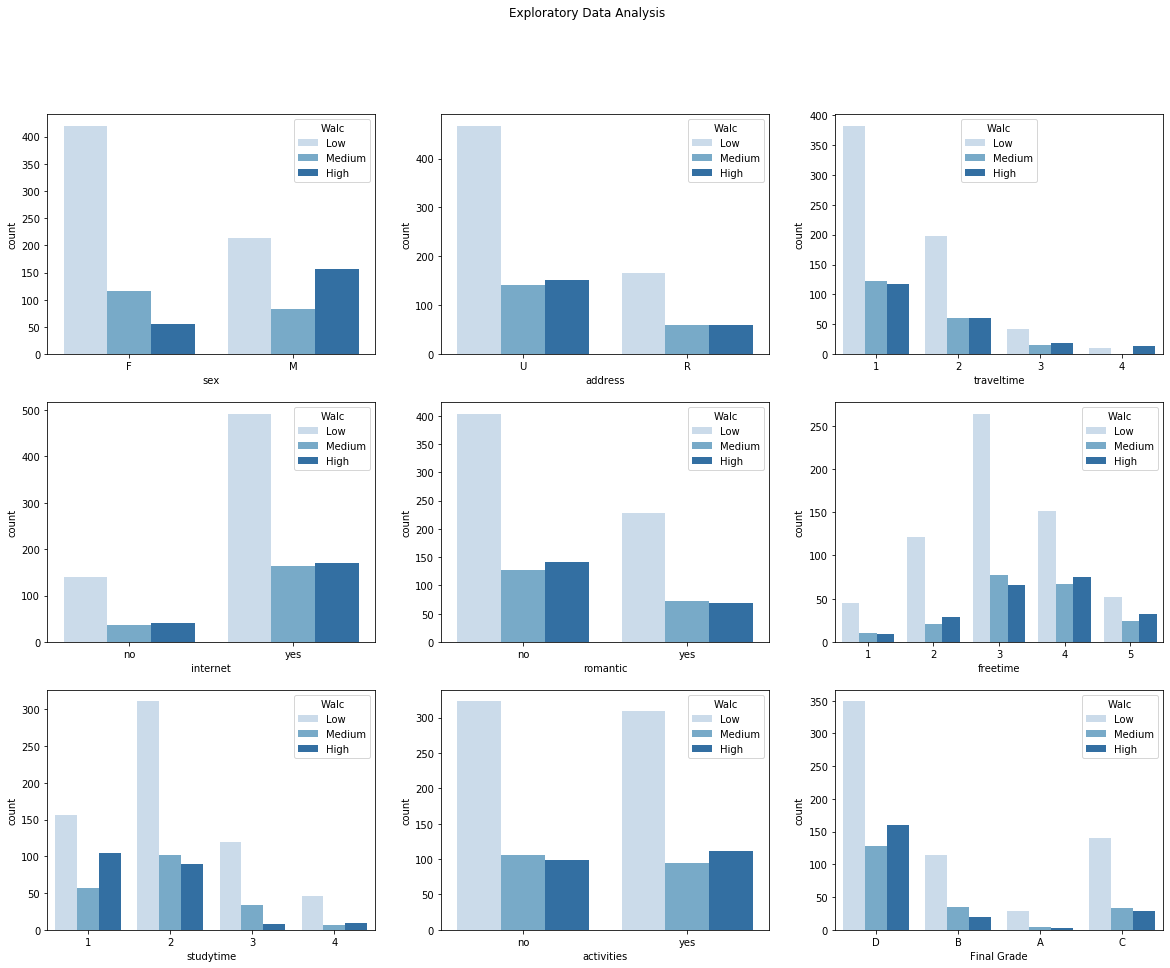

In [40]:
#Exploratory data analysis to understand if alcohol consuption in weekends is related to other demographic and family related information

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('Exploratory Data Analysis')


ax1 = sns.countplot(x="sex", hue="Walc", data=studentDS2, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x="address", hue="Walc", data=studentDS2, palette="Blues",ax=axes[0,1])
ax3 = sns.countplot(x="traveltime", hue="Walc", data=studentDS2, palette="Blues",ax=axes[0,2])
ax4 = sns.countplot(x="internet", hue="Walc", data=studentDS2, palette="Blues", ax=axes[1,0])
ax5 = sns.countplot(x="romantic", hue="Walc", data=studentDS2, palette="Blues", ax=axes[1,1])
ax6 = sns.countplot(x="freetime", hue="Walc", data=studentDS2, palette="Blues", ax=axes[1,2])
ax7 = sns.countplot(x="studytime", hue="Walc", data=studentDS2, palette="Blues", ax=axes[2,0])
ax8 = sns.countplot(x="activities", hue="Walc", data=studentDS2, palette="Blues", ax=axes[2,1])
ax9 = sns.countplot(x="Final Grade", hue="Walc", data=studentDS2, palette="Blues", ax=axes[2,2]);

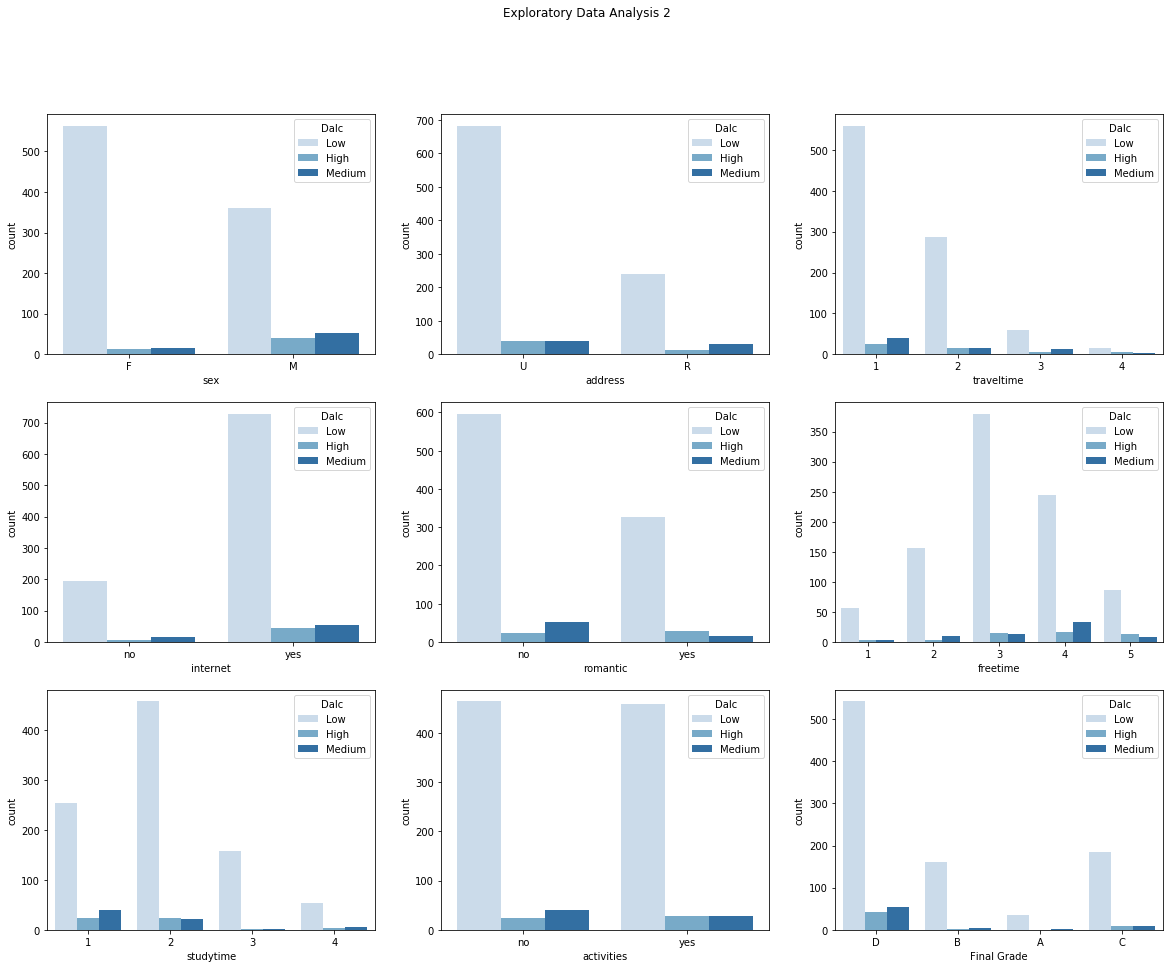

In [41]:
#Exploratory data analysis to understand if alcohol consuption in weekdays is related to other demographic and family related information

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('Exploratory Data Analysis 2')


ax1 = sns.countplot(x="sex", hue="Dalc", data=studentDS2, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x="address", hue="Dalc", data=studentDS2, palette="Blues",ax=axes[0,1])
ax3 = sns.countplot(x="traveltime", hue="Dalc", data=studentDS2, palette="Blues",ax=axes[0,2])
ax4 = sns.countplot(x="internet", hue="Dalc", data=studentDS2, palette="Blues", ax=axes[1,0])
ax5 = sns.countplot(x="romantic", hue="Dalc", data=studentDS2, palette="Blues", ax=axes[1,1])
ax6 = sns.countplot(x="freetime", hue="Dalc", data=studentDS2, palette="Blues", ax=axes[1,2])
ax7 = sns.countplot(x="studytime", hue="Dalc", data=studentDS2, palette="Blues", ax=axes[2,0])
ax8 = sns.countplot(x="activities", hue="Dalc", data=studentDS2, palette="Blues", ax=axes[2,1])
ax9 = sns.countplot(x="Final Grade", hue="Dalc", data=studentDS2, palette="Blues", ax=axes[2,2]);

################################################
#In conclusion this dataset wont be used for the final Capstone report  because no relevant data was revealed. 

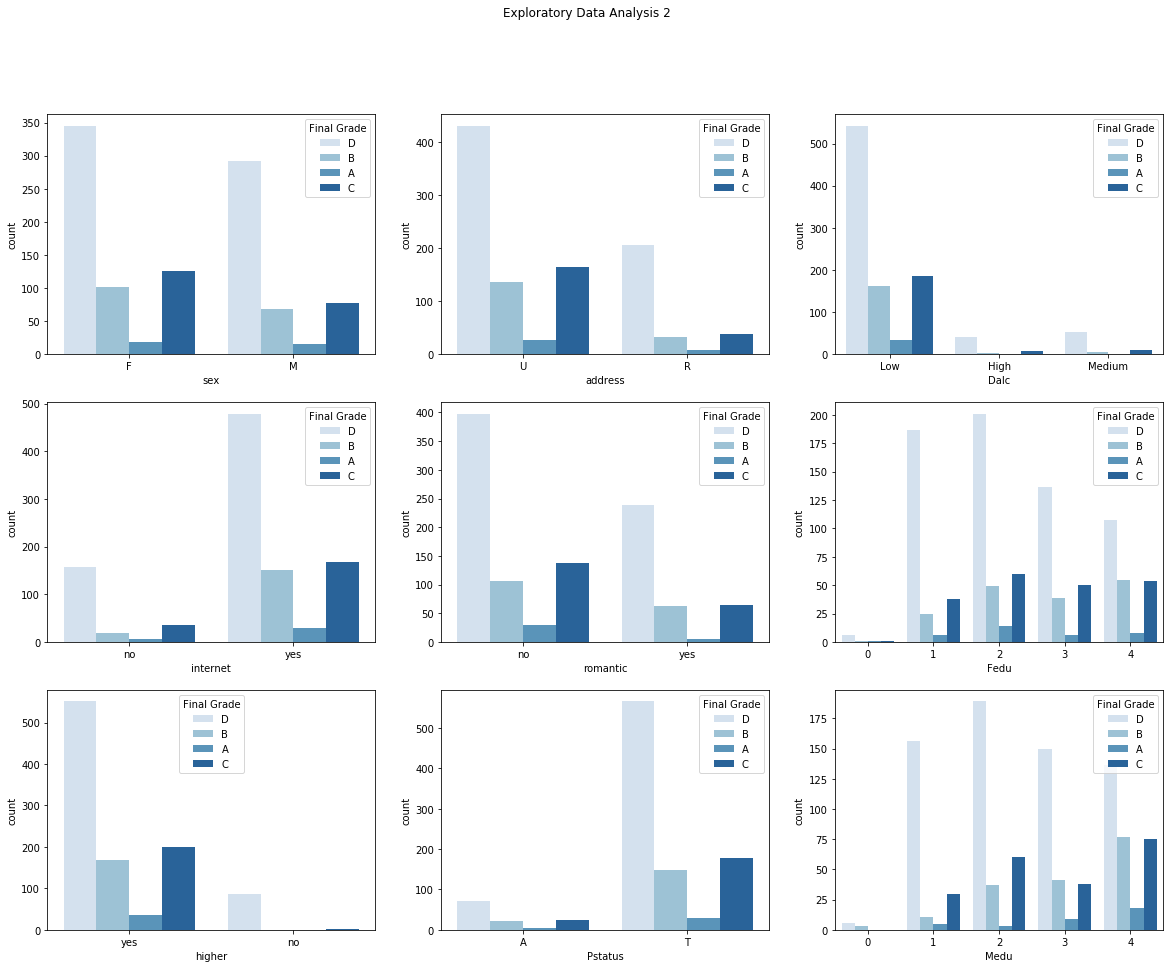

In [50]:
#Exploratory data analysis to understand if alcohol consuption in weekdays is related to other demographic and family related information

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('Exploratory Data Analysis 2')


ax1 = sns.countplot(x="sex", hue="Final Grade", data=studentDS2, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x="address", hue="Final Grade", data=studentDS2, palette="Blues",ax=axes[0,1])
ax3 = sns.countplot(x="Dalc", hue="Final Grade", data=studentDS2, palette="Blues",ax=axes[0,2])
ax4 = sns.countplot(x="internet", hue="Final Grade", data=studentDS2, palette="Blues", ax=axes[1,0])
ax5 = sns.countplot(x="romantic", hue="Final Grade", data=studentDS2, palette="Blues", ax=axes[1,1])
ax6 = sns.countplot(x="Fedu", hue="Final Grade", data=studentDS2, palette="Blues", ax=axes[1,2])
ax7 = sns.countplot(x="higher", hue="Final Grade", data=studentDS2, palette="Blues", ax=axes[2,0])
ax8 = sns.countplot(x="Pstatus", hue="Final Grade", data=studentDS2, palette="Blues", ax=axes[2,1])
ax9 = sns.countplot(x="Medu", hue="Final Grade", data=studentDS2, palette="Blues", ax=axes[2,2]);

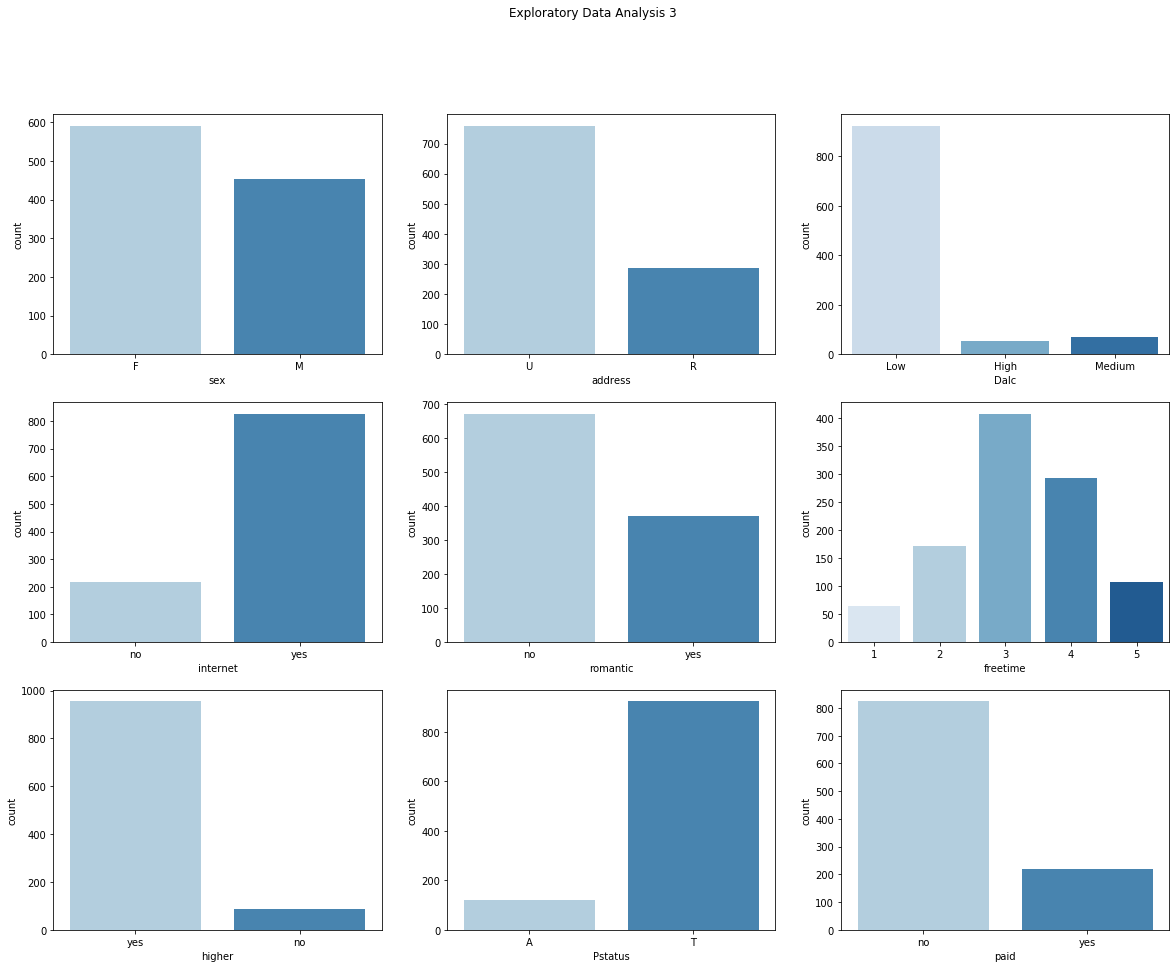

In [49]:
#Exploratory data analysis understand how grades are related to the other demographic variables

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('Exploratory Data Analysis 3')



ax1 = sns.countplot(x="sex" ,data=studentDS2, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x="address",  data=studentDS2, palette="Blues",ax=axes[0,1])
ax3 = sns.countplot(x="Dalc",  data=studentDS2, palette="Blues",ax=axes[0,2])
ax4 = sns.countplot(x="internet",  data=studentDS2, palette="Blues", ax=axes[1,0])
ax5 = sns.countplot(x="romantic",  data=studentDS2, palette="Blues", ax=axes[1,1])
ax6 = sns.countplot(x="freetime", data=studentDS2, palette="Blues", ax=axes[1,2])
ax7 = sns.countplot(x="higher",  data=studentDS2, palette="Blues", ax=axes[2,0])
ax8 = sns.countplot(x="Pstatus",  data=studentDS2, palette="Blues", ax=axes[2,1])
ax9 = sns.countplot(x="paid",  data=studentDS2, palette="Blues", ax=axes[2,2]);

In [10]:
#features - Selecting the independent variables
features = studentDS.iloc[:,1:25]
print('Summary of feature sample')
features.head()

Summary of feature sample


,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,18,1,0,0,4,4,2,2,0,True,...,True,False,False,4,3,4,1,1,3,6
1,17,1,0,1,1,1,1,2,0,False,...,True,True,False,5,3,3,1,1,3,4
2,15,1,1,1,1,1,1,2,3,True,...,True,True,False,4,3,2,2,3,3,10
3,15,1,0,1,4,2,1,3,0,False,...,True,True,True,3,2,2,1,1,5,2
4,16,1,0,1,3,3,1,2,0,False,...,True,False,False,4,3,2,1,2,5,4


In [11]:
#selecting the dependent variable, in this case is the final grade
depVar = studentDS['Final Grade']
print(depVar)

0       D
1       D
2       D
3       B
4       D
       ..
1039    D
1040    B
1041    D
1042    D
1043    D
Name: Final Grade, Length: 1044, dtype: category
Categories (4, object): [A, B, C, D]


In [12]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1045])
X_train.head()

,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,18,1,0,0,4,4,2,2,0,True,...,True,False,False,4,3,4,1,1,3,6
1,17,1,0,1,1,1,1,2,0,False,...,True,True,False,5,3,3,1,1,3,4
2,15,1,1,1,1,1,1,2,3,True,...,True,True,False,4,3,2,2,3,3,10
3,15,1,0,1,4,2,1,3,0,False,...,True,True,True,3,2,2,1,1,5,2
4,16,1,0,1,3,3,1,2,0,False,...,True,False,False,4,3,2,1,2,5,4


In [13]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1045]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1044


0    D
1    D
2    D
3    B
4    D
Name: Final Grade, dtype: category
Categories (4, object): [A, B, C, D]

In [14]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
     age address famsize Pstatus Medu Fedu traveltime studytime failures  \
944   17       0       0       1    4    2          2         2        0   
945   16       1       1       0    2    2          2         2        0   
946   17       1       0       1    3    2          2         2        0   
947   19       1       0       1    1    1          1         2        2   
948   17       1       1       0    1    0          1         1        0   

    schoolsup  ...  higher internet romantic  famrel freetime goout Dalc  \
944      True  ...    True     True    False       4        3     3    2   
945     False  ...    True     True     True       4        1     2    2   
946     False  ...    True     True    False       4        1     2    2   
947     False  ...   False     True    False       4        4     3    3   
948     False  ...    True    False     True       4        1     2    1   

     Walc health absence

In [15]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


944    A
945    C
946    C
947    D
948    D
Name: Final Grade, dtype: category
Categories (4, object): [A, B, C, D]

In [16]:
#Cross Validation
X_train, X_test, y_train, y_test = train_test_split(features,depVar)


In [17]:
X_train.shape, X_test.shape


((783, 24), (261, 24))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((587, 24), (196, 24))

In [19]:
#working in the RF Model first
#Model #1
modelRF = RandomForestClassifier( n_estimators = 100, min_samples_split = 5, max_features = 'auto')
modelRF.fit(X_train,y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
#working in KNN model
#Model #2
modelKNN = KNeighborsClassifier()
parameters = {'n_neighbors':[4,5,6,7],
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree'],
              'n_jobs':[-1]}

#Fit the model
modelKNN = GridSearchCV(modelKNN, param_grid=parameters)
modelKNN.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [1, 3, 5], 'n_jobs': [-1],
                         'n_neighbors': [4, 5, 6, 7]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [21]:
#working in the SVC Model
#Model #3
# defining parameter range 
modelSVC = SVC()
param_grid = {'C': [0.1, 1, 10],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
modelSVC = GridSearchCV(SVC(), param_grid, refit = True) 
  
# fitting the model for grid search 
modelSVC.fit(X_train, y_train) 

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [22]:
#Choosing the Right Model
print(cross_val_score(modelSVC, X_train, y_train))
modelSVC.score(X_train,y_train)

[0.58474576 0.59322034 0.58119658 0.58974359 0.60683761]


0.9914821124361158

In [23]:
#Best Model
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[0.60169492 0.58474576 0.64102564 0.60683761 0.5982906 ]


0.9352640545144804

In [24]:
print(cross_val_score(modelKNN, X_train, y_train))
modelKNN.score(X_train,y_train)

[0.48305085 0.49152542 0.56410256 0.60683761 0.55555556]


0.6678023850085179

In [25]:
#Doing the predictions with the 3 models and cheking the accuracy
RF_predict = modelRF.predict(X_test)
KNN_predict = modelKNN.predict(X_test)
SVC_predict = modelSVC.predict(X_test)

In [26]:
#Best Model
accuracy_score(y_test, RF_predict)

0.6938775510204082

In [27]:
accuracy_score(y_test, KNN_predict)

0.5969387755102041

In [28]:
accuracy_score(y_test, SVC_predict)

0.673469387755102

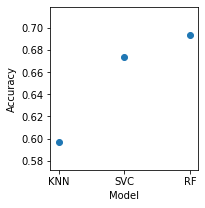

In [29]:
#plotting the accuracy of the tuned models

knnplot=accuracy_score(y_test, KNN_predict)
svmplot=accuracy_score(y_test, SVC_predict)
rfplot=accuracy_score(y_test, RF_predict)
names = ['KNN', 'SVC', 'RF']
values = [knnplot, svmplot, rfplot]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.scatter(names, values)

In [64]:
#Performing adjustments , I will do the predictions based only on Fail or pass , instead of A,B,C,D grades 
studentDS3 = pd.read_csv('/Users/moramoga/Documents/Big Data/Course 5 /Task 5 Capstone/Encoded Dataset 3.csv', header =0)



In [65]:
#change the data to the correct types
studentDS3 = studentDS3.astype({"health":'category',"goout":'category',"Dalc":'category',"Fedu":'category',"Medu":'category',"Final Grade":'category',"Walc":'category',"absences":'category',"freetime":'category',"romantic":'category',"internet":'category',"higher":'category',"activities":'category',"paid":'category',"schoolsup":'category',"failures":'category',"studytime":'category',"sex":'category', "age":'int', "address":'category',"famsize":'category',"Pstatus":'category',"traveltime":'category',}) 

In [66]:
#features - Selecting the independent variables
features2 = studentDS3.iloc[:,1:25]
print('Summary of feature sample')
features2.head()

Summary of feature sample


,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,18,1,0,0,4,4,2,2,0,True,...,True,False,False,4,3,4,1,1,3,6
1,17,1,0,1,1,1,1,2,0,False,...,True,True,False,5,3,3,1,1,3,4
2,15,1,1,1,1,1,1,2,3,True,...,True,True,False,4,3,2,2,3,3,10
3,15,1,0,1,4,2,1,3,0,False,...,True,True,True,3,2,2,1,1,5,2
4,16,1,0,1,3,3,1,2,0,False,...,True,False,False,4,3,2,1,2,5,4


In [67]:
#selecting the dependent variable, in this case is the final grade
depVar2 = studentDS3['Final Grade']
print(depVar2)

0       F
1       F
2       F
3       P
4       F
       ..
1039    F
1040    P
1041    F
1042    F
1043    F
Name: Final Grade, Length: 1044, dtype: category
Categories (2, object): [F, P]


In [74]:
#Training Set (Feature Space: X Training)
X_train2 = (features2[: 1045])
X_train2.head()

,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,18,1,0,0,4,4,2,2,0,True,...,True,False,False,4,3,4,1,1,3,6
1,17,1,0,1,1,1,1,2,0,False,...,True,True,False,5,3,3,1,1,3,4
2,15,1,1,1,1,1,1,2,3,True,...,True,True,False,4,3,2,2,3,3,10
3,15,1,0,1,4,2,1,3,0,False,...,True,True,True,3,2,2,1,1,5,2
4,16,1,0,1,3,3,1,2,0,False,...,True,False,False,4,3,2,1,2,5,4


In [69]:
#Dependent Variable Training Set (y Training)
y_train2 = depVar2[: 1045]
y_train_count = len(y_train2.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train2.head()

The number of observations in the Y training set are: 1044


0    F
1    F
2    F
3    P
4    F
Name: Final Grade, dtype: category
Categories (2, object): [F, P]

In [70]:
#Testing Set (X Testing)
X_test2 = features[-100:]
X_test_count = len(X_test2.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test2.head())

The number of observations in the feature testing set is: 100
     age address famsize Pstatus Medu Fedu traveltime studytime failures  \
944   17       0       0       1    4    2          2         2        0   
945   16       1       1       0    2    2          2         2        0   
946   17       1       0       1    3    2          2         2        0   
947   19       1       0       1    1    1          1         2        2   
948   17       1       1       0    1    0          1         1        0   

    schoolsup  ...  higher internet romantic  famrel freetime goout Dalc  \
944      True  ...    True     True    False       4        3     3    2   
945     False  ...    True     True     True       4        1     2    2   
946     False  ...    True     True    False       4        1     2    2   
947     False  ...   False     True    False       4        4     3    3   
948     False  ...    True    False     True       4        1     2    1   

     Walc health absence

In [72]:
#Ground Truth (y_test) 
y_test2 = depVar2[-100:]
y_test_count = len(y_test2.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test2.head()

The number of observations in the Y training set are: 100


944    P
945    P
946    P
947    F
948    F
Name: Final Grade, dtype: category
Categories (2, object): [F, P]

In [76]:
#Cross Validation
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2,depVar2)

In [84]:
X_train2.shape, X_test2.shape


((587, 24), (196, 24))

In [78]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train2, y_train2)
X_train2.shape, X_test2.shape

((587, 24), (196, 24))

In [79]:
modelRF2 = RandomForestClassifier( n_estimators = 100, min_samples_split = 5, max_features = 'auto')
modelRF2.fit(X_train2,y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
print(cross_val_score(modelRF2, X_train2, y_train2))
modelRF.score(X_train2,y_train2)

[0.74576271 0.73728814 0.7008547  0.77777778 0.77777778]


0.0

In [82]:
#prediction 
RF_predict2 = modelRF2.predict(X_test2)


In [83]:
#accuracy
accuracy_score(y_test2, RF_predict2)

0.7346938775510204